# Seaborn: relplot

In [ ]:
import seaborn as sns

In [3]:
df = sns.load_dataset('titanic')

df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


Create new column with age decade bucket for each passenger.

In [4]:
df['decade'] = [age//10*10 for age in df.age]

df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,decade
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,20.0
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,30.0
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,20.0
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,30.0
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,30.0


## Intro Visuals

In [ ]:
from matplotlib import pyplot as plt

In [ ]:
sns.set(style='darkgrid', font_scale=2)  

g = sns.relplot(x='age', y='fare', data=df,
            row='class',
            hue='survived',
            aspect=1.5,
                s=300,
                palette=['black', 'red'],
                style='survived',
                markers=['X', 'o']
           );
g.set_titles(row_template="{row_name} Class")
g.set_xlabels('Passenger Age')
g.set_ylabels('Fare')
leg = g._legend
leg.set_title('Survived');
#plt.savefig('18catplot_figure_facetExample.png', dpi=200, bbox_inches='tight');

In [ ]:
sns.set(style='white', font_scale=1.5)  

g = sns.relplot(x='age', y='fare', 
                data=df,
                col='sex',
                hue='survived',
                aspect=1.7,
                height=3,
                palette=['black', 'red'],
                style='survived',
                markers=['X', 'o'],
                s=120
               )
g.set_titles(col_template="")
g.set_xlabels("")
g.set_ylabels('');
#plt.savefig('18catplot_figure_scatterThumb.png', dpi=200);

In [ ]:
g = sns.relplot(x='decade', y='survived', 
                data=df[df.age < 70],
                hue='sex',
                col='sex',
                aspect=1.7,
                height=3,
                palette=['black', 'red'],
                style='sex',
                lw=3,
                kind='line'
               )
g.set_titles(col_template="")
g.set_xlabels("")
g.set_ylabels('');
#plt.savefig('18catplot_figure_lineThumb.png', dpi=200);

In [ ]:
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)
plt.rc('axes', labelsize=10)  

## Basics

In [5]:
sns.set_style('white')

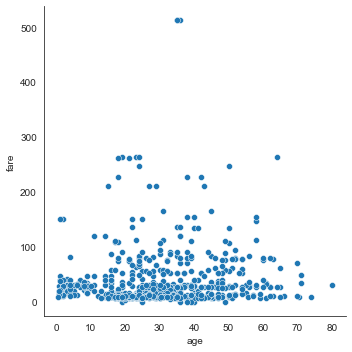

In [6]:
sns.relplot(x='age', y='fare', data=df);

### Categorical Variables: Hue, Style, Size

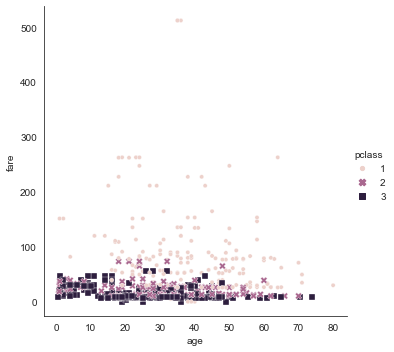

In [7]:
sns.relplot(x='age', y='fare', 
            data=df,
            hue='pclass',
            style='pclass',
            size='pclass'
           );

### Kind

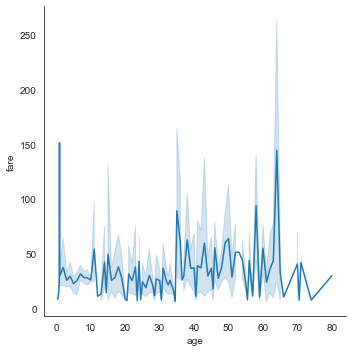

In [8]:
sns.relplot(x='age', y='fare', data=df, kind='line');

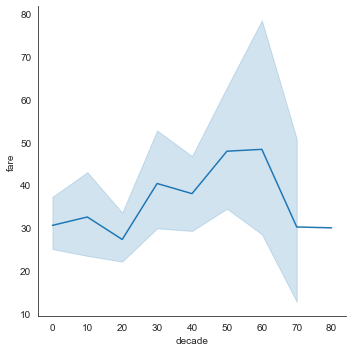

In [9]:
sns.relplot(x='decade', y='fare', data=df, kind='line');

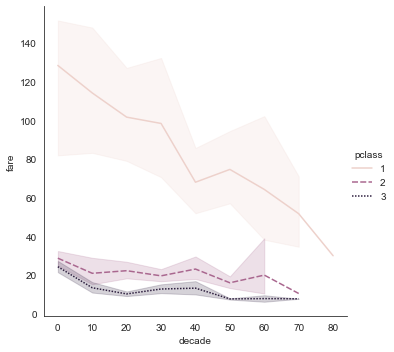

In [10]:
sns.relplot(x='decade', y='fare', 
            data=df, 
            kind='line',
            hue='pclass',
            style='pclass'
           );

## Small Multiples (FacetGrid)

### `row`, `col`

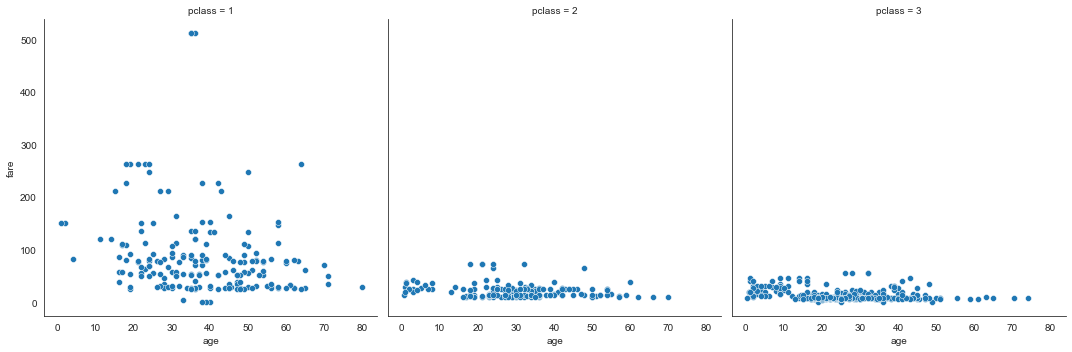

In [12]:
sns.relplot(x='age', y='fare',
            data=df,
            col='pclass'
           );

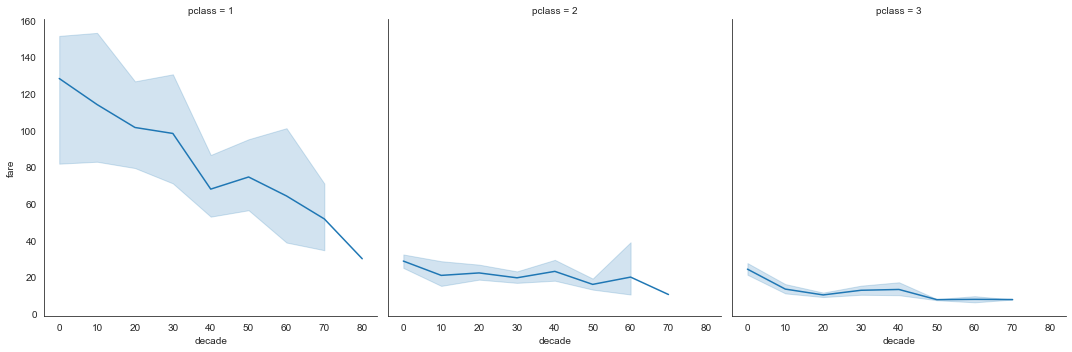

In [13]:
sns.relplot(x='decade', y='fare',
            data=df,
            kind='line',
            col='pclass'
           );

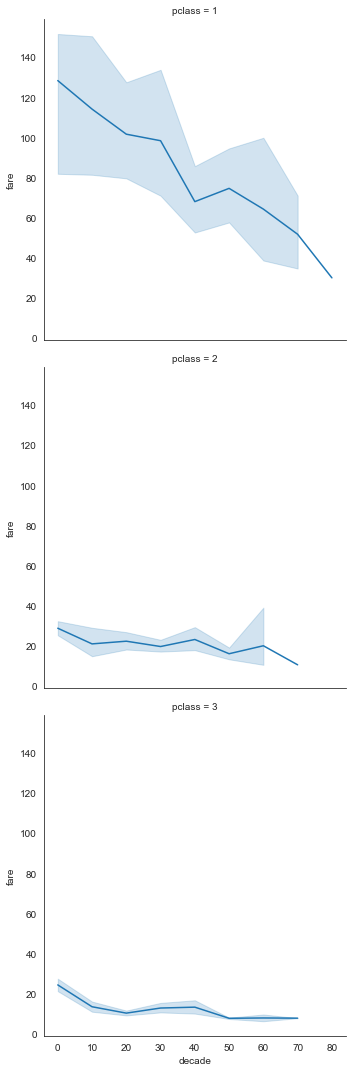

In [14]:
sns.relplot(x='decade', y='fare',
            data=df,
            kind='line',
            row='pclass'
           );

### `col_wrap`

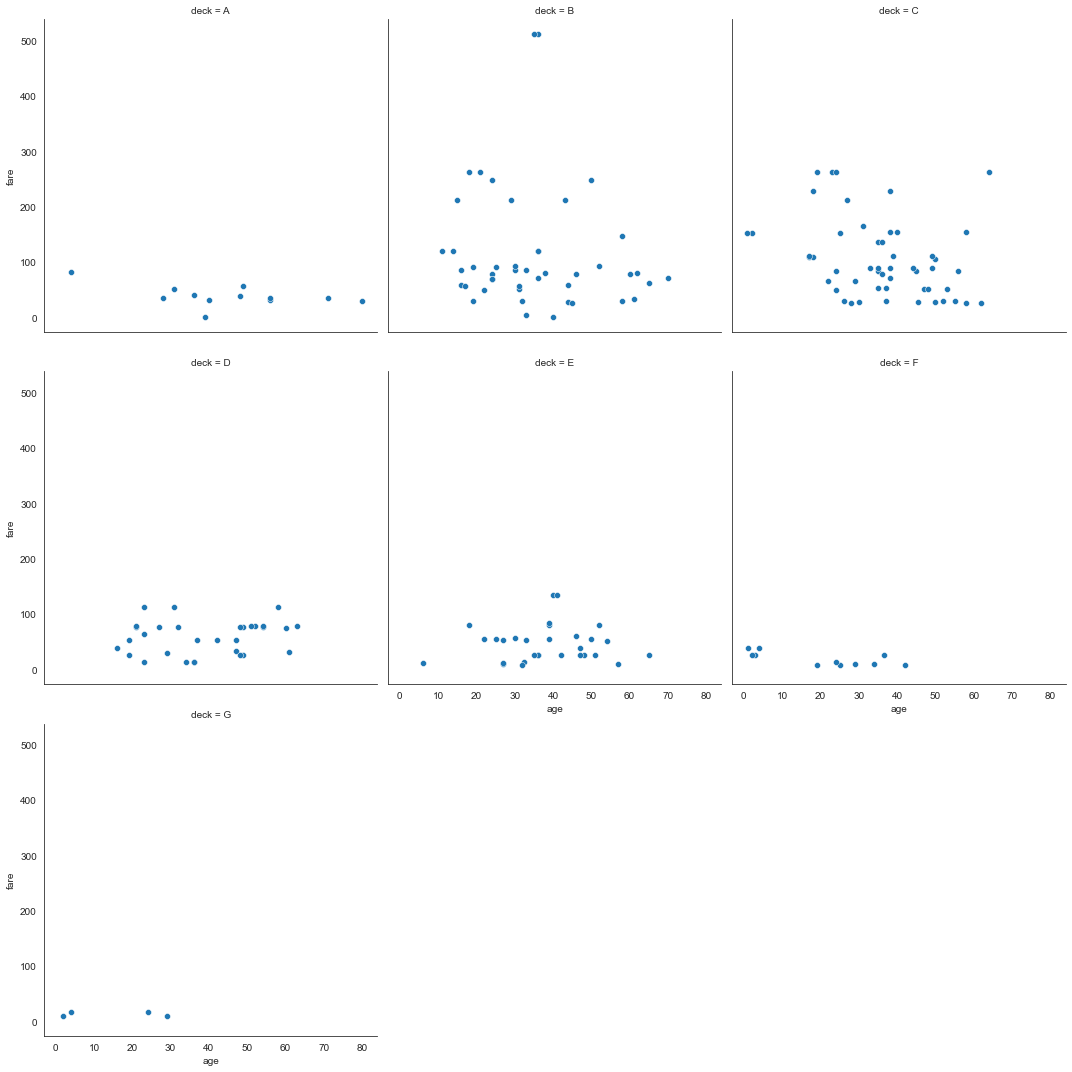

In [15]:
sns.relplot(x='age', y='fare',
            data=df,
            col='deck',
            col_wrap=3
           );

## Styling

In general, additional keyword arguments will be passed to the kind of plot selected.  

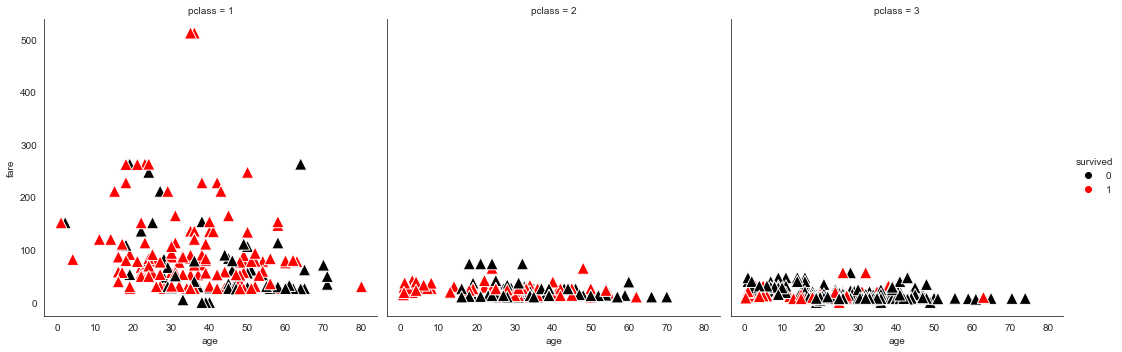

In [16]:
sns.relplot(x='age', y='fare', data=df,
            col='pclass',
            hue='survived',
            s=150,
            palette=['black', 'red'],
            marker='^'
           );

### `markers`, `sizes`

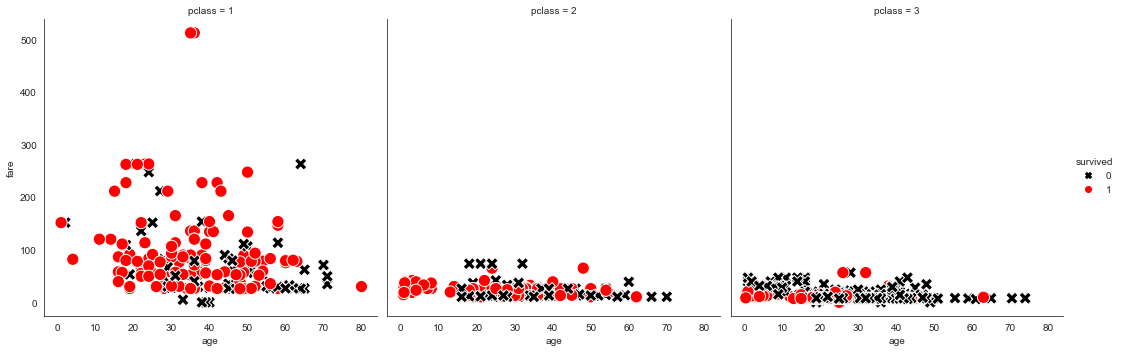

In [17]:
sns.relplot(x='age', y='fare', data=df,
            col='pclass',
            hue='survived',
            s = 150, 
            palette=['black', 'red'],
            style='survived',
            markers=['X', 'o']
           );

### FacetGrid Styling

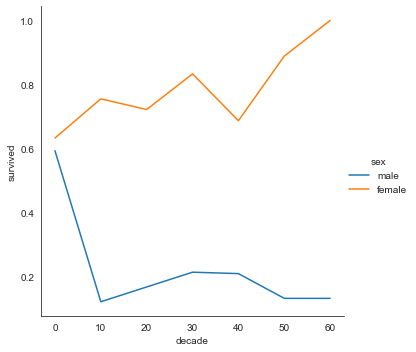

In [18]:
g = sns.relplot(x='decade', y='survived',
                data=df[df.age < 70],
                kind='line',
                hue='sex',
                ci=None
               );

In [19]:
type(g)

seaborn.axisgrid.FacetGrid

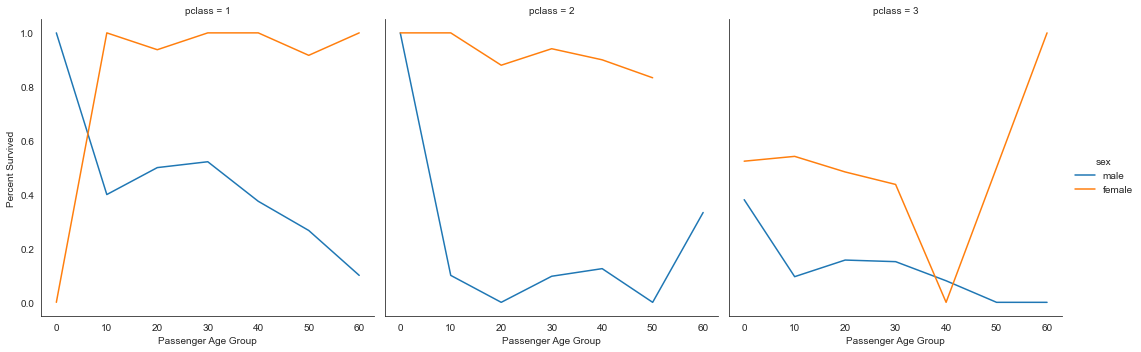

In [20]:
g = sns.relplot(x='decade', y='survived',
                data=df[df.age < 70],
                kind='line',
                hue='sex',
                ci=None,
                col='pclass'
               )

g.set_xlabels('Passenger Age Group')
g.set_ylabels("Percent Survived");